In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
advertising = pd.read_csv( r"C:\Users\hp\Downloads\Advertising.csv")
advertising.head()



#Read the given CSV file, and view some sample records



,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


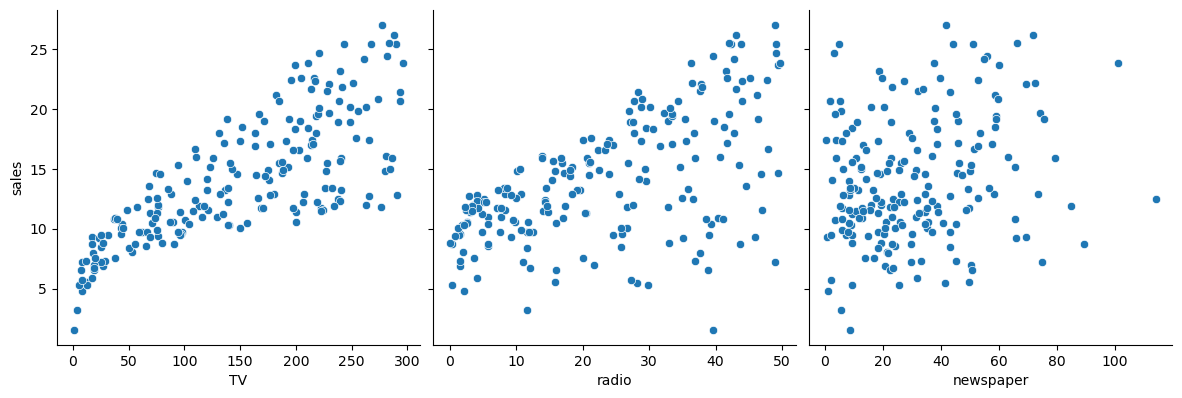

In [6]:
sns.pairplot(advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4, kind='scatter')

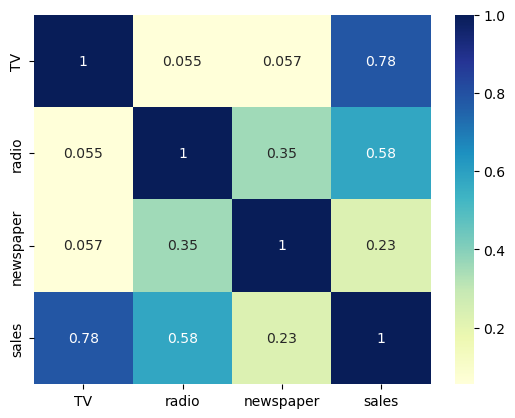

In [7]:
sns.heatmap(advertising.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [8]:
X = advertising[ 'TV' ]
y = advertising[ 'sales' ]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [10]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140,)
(60,)
(140,)
(60,)


In [11]:
import statsmodels.api as sm

In [12]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [13]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [14]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           2.84e-30
Time:                        12:11:41   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

In [19]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [20]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [21]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  2.8241456288327016
R-squared:  0.59429872677833


In [24]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [25]:
print(X_train.shape)
print(X_train.shape)

(140, 1)
(140, 1)


In [26]:
from sklearn.linear_model import LinearRegression
X = advertising[['TV', 'radio', 'newspaper']]  
y = advertising['sales']                       

model = LinearRegression()
model.fit(X, y)

LinearRegression()